# CS131-8L BM2 PARAGUAY 1Q2223
## GROUP MEMBERS
- CORTEZ, MARK MOISES T.
- GENETA, DANIEL M.
- GIL, CLAIRE FRANCHESKA M.
- PEPITO, ALYSSA MAE M.
- SOLEÑO, KEZIAH ANTONETTE C.
- VELASCO, SADIE CATHERINE E.

### Import Libraries

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Understanding

#### Collection of Initial Data

In [332]:
# Read dataset
df = pd.read_excel("satisfaction_2015.xlsx")
df = df.rename(columns={"satisfaction_v2":"satisfaction"}) # Rename satisfaction_v2 to satisfaction
df.head()

,id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


#### Data Description

In [333]:
# Getting summary statistics
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


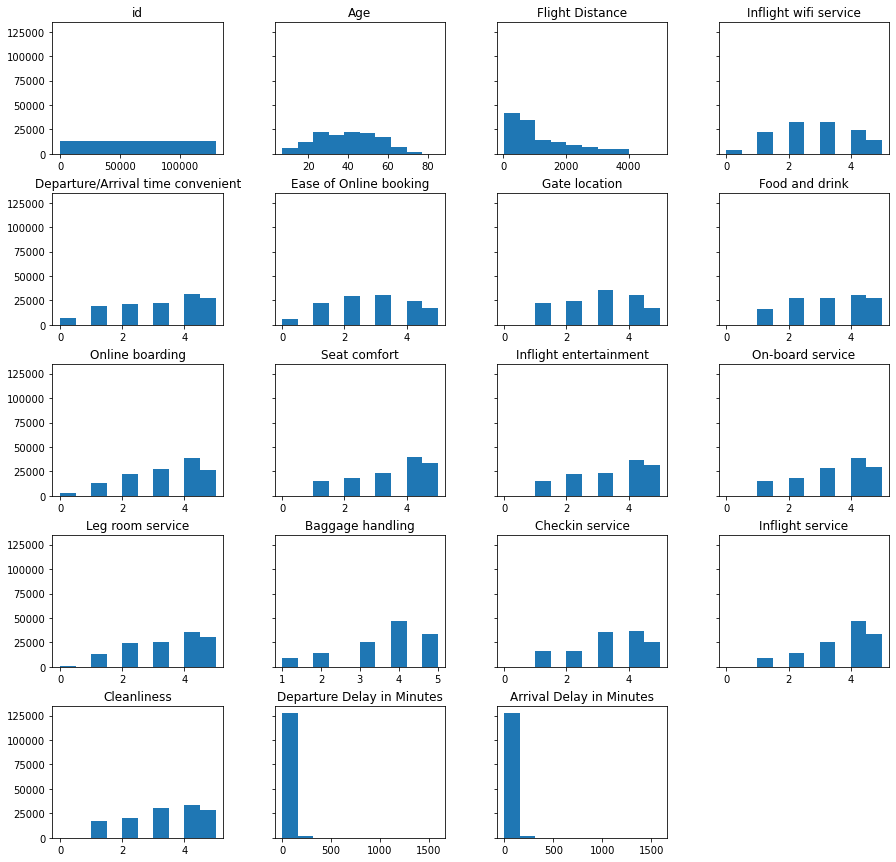

In [334]:
# Create histograms to show distribution of variables

numeric_variables = list(df.select_dtypes(include=['int64', 'float64'])) #select the numeric variables

df[numeric_variables].describe().apply(lambda x:round(x,2)).T  #apply describe method

histograms = df[numeric_variables].hist(bins =10, 
                                              xlabelsize=10, 
                                              ylabelsize=10, 
                                              grid=False, 
                                              sharey= True, figsize = (15,15))

#### Data Exploration

##### Exploring categorical data

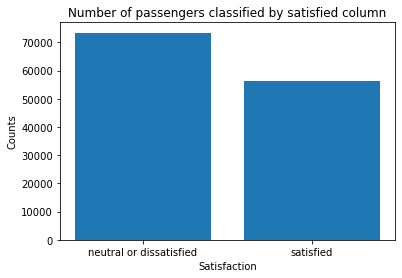

In [335]:
satisfaction_counts = df['satisfaction'].value_counts().rename_axis('satisfaction').reset_index(name='counts')
plt.bar(satisfaction_counts['satisfaction'].to_numpy(), satisfaction_counts['counts'].to_numpy())
plt.title("Number of passengers classified by satisfied column")
plt.xlabel('Satisfaction')
plt.ylabel('Counts')
plt.show()

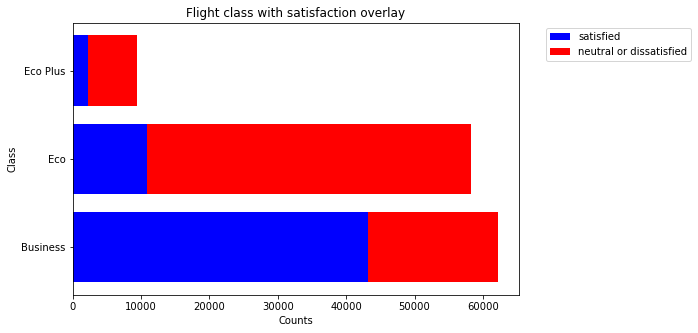

In [336]:
class_satisfaction_grpby = df[["Class", "satisfaction"]]
class_satisfaction_grpby = class_satisfaction_grpby.groupby(["Class", "satisfaction"]).size().reset_index(name="counts")

business_satisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'satisfied'")['counts'].tolist()
eco_satisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'satisfied'")['counts'].tolist()
eco_plus_satisfied = class_satisfaction_grpby.query("Class == 'Eco Plus' and satisfaction == 'satisfied'")['counts'].tolist()

business_unsatisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
eco_unsatisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()
eco_plus_unsatisfied = class_satisfaction_grpby.query("Class == 'Eco Plus' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

x = ['Business', 'Eco', 'Eco Plus']
y1 = np.array([business_satisfied, eco_satisfied, eco_plus_satisfied]).flatten()
y2 = np.array([business_unsatisfied, eco_unsatisfied, eco_plus_unsatisfied]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Class")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Flight class with satisfaction overlay")
plt.show()

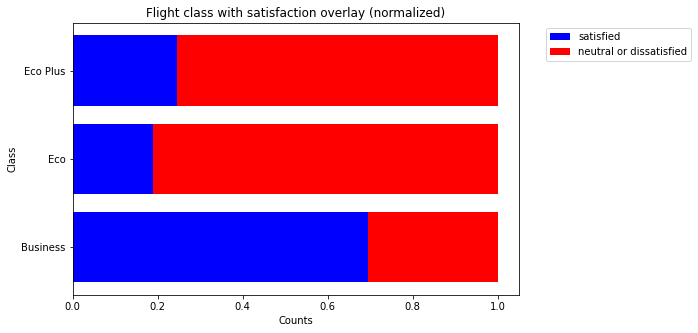

In [337]:
business_total = np.add(business_satisfied, business_unsatisfied)
business_satis_percent = np.divide(business_satisfied, business_total)
business_unsatis_percent = np.divide(business_unsatisfied, business_total)
business_satis_percent = np.round(business_satis_percent, 3)
business_unsatis_percent = np.round(business_unsatis_percent, 3)

eco_total = np.add(eco_satisfied, eco_unsatisfied)
eco_satis_percent = np.divide(eco_satisfied, eco_total)
eco_unsatis_percent = np.divide(eco_unsatisfied, eco_total)
eco_satis_percent = np.round(eco_satis_percent, 3)
eco_unsatis_percent = np.round(eco_unsatis_percent, 3)

eco_plus_total = np.add(eco_plus_satisfied, eco_plus_unsatisfied)
eco_plus_satis_percent = np.divide(eco_plus_satisfied, eco_plus_total)
eco_plus_unsatis_percent = np.divide(eco_plus_unsatisfied, eco_plus_total)
eco_plus_satis_percent = np.round(eco_plus_satis_percent, 3)
eco_plus_unsatis_percent = np.round(eco_plus_unsatis_percent, 3)

y1 = np.array([business_satis_percent, eco_satis_percent, eco_plus_satis_percent]).flatten()
y2 = np.array([business_unsatis_percent, eco_unsatis_percent, eco_plus_unsatis_percent]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Class")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Flight class with satisfaction overlay (normalized)")
plt.show() # Objective 1

In [338]:
# gender_satisfaction_grpby = df[["Class", "Gender"]]
# gender_satisfaction_grpby = class_satisfaction_grpby.groupby(["Class", "Gender"]).size().reset_index(name="counts")

# male_satisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'satisfied'")['counts'].tolist()
# female_satisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'satisfied'")['counts'].tolist()

# male_unsatisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
# female_unsatisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

##### Exploring numerical data

In [339]:
# Create column named 'satisfaction_int' where 0 = neutral/dissatisfied and 1 = satisfied
df['satisfaction_int'] = 0
df['satisfaction_int'].loc[df['satisfaction'] == 'satisfied'] = 1

C:\Users\danie\AppData\Local\Temp\ipykernel_20300\1086100462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction_int'].loc[df['satisfaction'] == 'satisfied'] = 1


In [340]:
# Get numeric attributes
numeric_features = df.select_dtypes(include=[np.number])

# Correlation (Objective 2)
correlation = numeric_features.corr()
print(correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
id                                   0.013182
Gate location                       -0.002793
Departure Delay in Minutes          -0.050740
Departure/Arrival time convenient   -0.054270
Arrival Delay in Minutes            -0.058275
Name: satisfaction_int, dtype: float64 



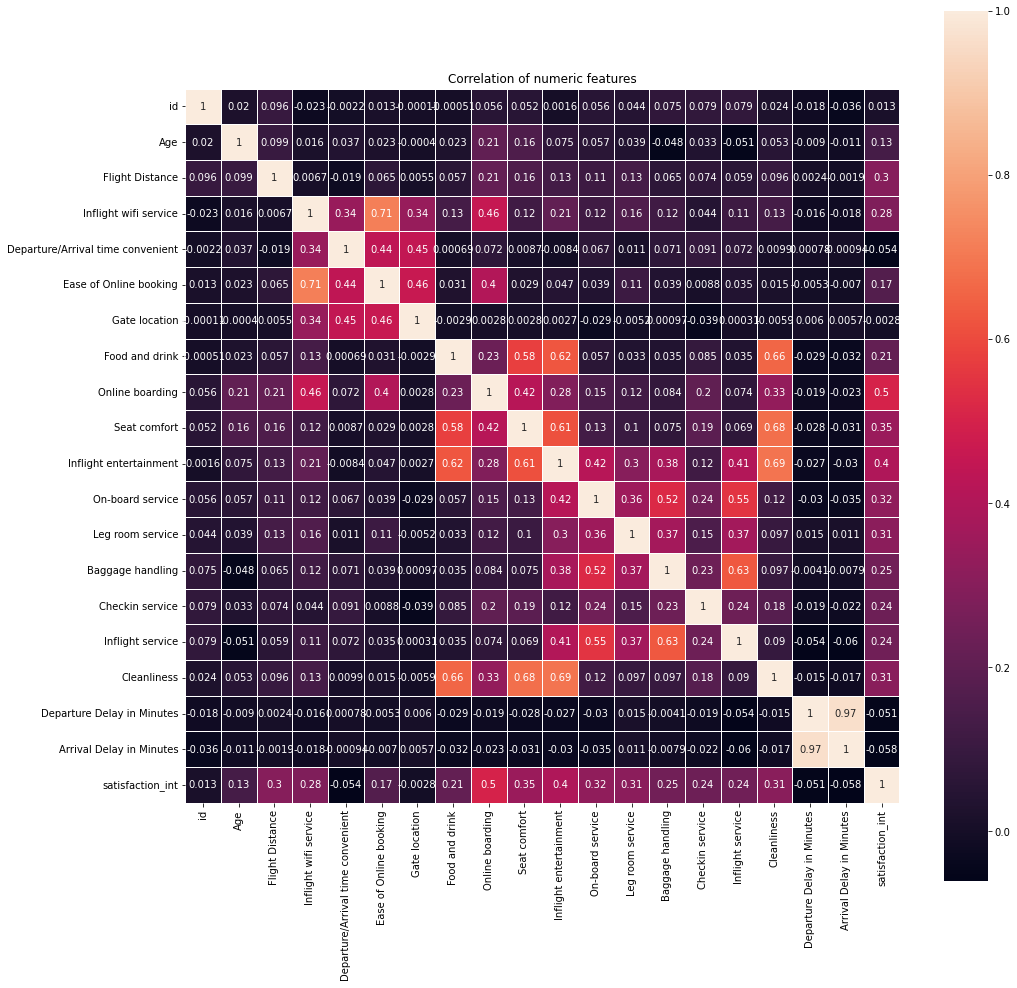

In [341]:
# Correlation heatmap
plt.figure(figsize=(16,16))
plt.title('Correlation of numeric features')
sns.heatmap(correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

#### Data Quality Verification

In [342]:
# Prints dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [343]:
# Getting sum of null values in the dataframe
df.isna().sum()

id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction_int

### Data Preparation

#### Data Selection

In [344]:
# Remove unneeded fields (i.e., id, gender, customer type, age, type of travel, flight distance, gate location)
df.drop(columns=['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Gate location'], axis=1, inplace=True)
df

,satisfaction,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_int
0,satisfied,Eco,0,2,0,3,0,3,3,1,5,3,3,4,3,0,0.0,1
1,satisfied,Eco,0,2,1,2,1,3,2,1,1,4,4,3,2,0,0.0,1
2,satisfied,Eco,0,3,0,3,0,3,3,3,5,3,2,3,3,0,0.0,1
3,satisfied,Eco,0,4,0,4,0,4,4,5,4,5,5,5,4,0,0.0,1
4,satisfied,Eco,0,5,0,3,5,3,3,3,4,5,3,4,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Business,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0,1
129876,satisfied,Eco,5,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0,1
129877,satisfied,Business,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0,1
129878,satisfied,Business,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0,1


#### Data Cleaning

In [345]:
# Code for data cleaning